# Imports

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd     #to work with data
from sklearn.feature_extraction.text import TfidfVectorizer

# Data

In [4]:
data = [
    'problem of evil',
    'evil queen',
    'horizon problem'
]

vec = CountVectorizer()
X = vec.fit_transform(data)

Let's convert the data into a panda table for readability

In [7]:
vis_data = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
vis_data

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


Many terms have an high frequency but they are not relevant for inferring content.\
We can essentially use the frequency those words appear in the entire document in order to mitigate this.

In [9]:
#TF - IDF = term frequency - inverse document frequency
vec2 = TfidfVectorizer()
X2 = vec2.fit_transform(data)
vis_data = pd.DataFrame(X2.toarray(), columns=vec2.get_feature_names_out())
vis_data

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


# Text classifier exercises

We will use a dataset containing data from various forums.\
We will use a supervised approach in order to label them to each forum topic.

In [10]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns       #for plotting the confusion matrix
import matplotlib.pyplot as plt

## Dataset

Since training the entire dataset would be too intensive for the CPU alone, let's take a subset of it.

In [11]:
categories = ['talk.religion.misc', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

# Model

Let's create a pipeline inside a variable.

In [12]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Training

In [13]:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

# Test the model

In [15]:
labels = model.predict(test.data)

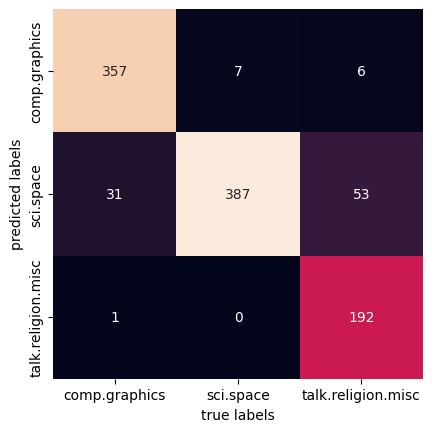

In [25]:
#Confusion matrix

conf_matrix = confusion_matrix(test.target, labels)
sns.heatmap(conf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels = train.target_names)
plt.xlabel('true labels')
plt.ylabel('predicted labels')
plt.show()

Let's try the classifier with our text

In [26]:
s = 'a light in the sky'
pred = model.predict([s])
train.target_names[pred[0]]

'sci.space'